# Fully Connected Network to classify MNIST digits

## Setup Imports

In [1]:
from __future__ import division, print_function
from keras.callbacks import Callback
from keras.layers import Dense, Activation, Dropout
from keras.models import Sequential
from keras.optimizers import SGD
from keras.regularizers import l2
from keras.utils import np_utils
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Using Theano backend.


## Download data

In [2]:
dataset = datasets.fetch_mldata("MNIST Original")
X = dataset.data
X = X / 255.0
Y = np_utils.to_categorical(dataset.target.astype("int"), 10)

## Split into training and test

In [3]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, test_size=0.3, random_state=0)
print(Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape)

(49000, 784) (21000, 784) (49000, 10) (21000, 10)


## Set up model

In [4]:
model = Sequential()
# input layer
model.add(Dense(128, input_shape=(Xtrain.shape[1], ), W_regularizer=l2(0.01)))
model.add(Activation("sigmoid"))
model.add(Dropout(0.2))
# first hidden layer
model.add(Dense(256, W_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
# second hidden layer
model.add(Dense(512, W_regularizer=l2(0.01)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
# output layer
model.add(Dense(10))
model.add(Activation("softmax"))

sgd = SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="categorical_crossentropy", optimizer=sgd)

## Train Model

In [5]:
# customized callback
class LossHistory(Callback):
    def on_train_begin(self, logs={}):
        self.losses = []
    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get("loss"))

In [6]:
history = LossHistory()
model.fit(Xtrain, Ytrain, batch_size=128, nb_epoch=10, shuffle=True, 
          validation_data=(Xtest, Ytest),
          callbacks=[history])

Train on 49000 samples, validate on 21000 samples
Epoch 1/10
49000/49000 [==============================] - 4s - loss: 1.8970 - val_loss: 0.5436
Epoch 2/10
49000/49000 [==============================] - 5s - loss: 1.1552 - val_loss: 0.4820
Epoch 3/10
49000/49000 [==============================] - 4s - loss: 1.1614 - val_loss: 0.5716
Epoch 4/10
49000/49000 [==============================] - 5s - loss: 1.1334 - val_loss: 0.5197
Epoch 5/10
49000/49000 [==============================] - 6s - loss: 1.1122 - val_loss: 0.9055
Epoch 6/10
49000/49000 [==============================] - 5s - loss: 1.1006 - val_loss: 0.4292
Epoch 7/10
49000/49000 [==============================] - 5s - loss: 1.0991 - val_loss: 0.4248
Epoch 8/10
49000/49000 [==============================] - 7s - loss: 1.0971 - val_loss: 0.4720
Epoch 9/10
49000/49000 [==============================] - 20s - loss: 1.1048 - val_loss: 0.4478
Epoch 10/10
49000/49000 [==============================] - 23s - loss: 1.0906 - val_loss: 0.51

## Evaluate Model

In [7]:
loss = model.evaluate(Xtest, Ytest, batch_size=128)
print("Loss on test set: %.3f" % (loss))

20992/21000 [============================>.] - ETA: 0sLoss on test set: 0.516


## Plot Loss

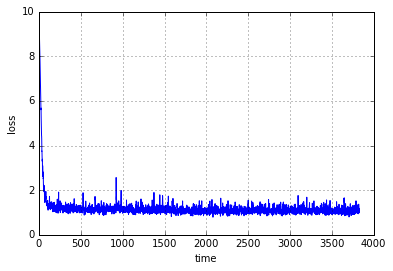

In [8]:
plt.plot(range(len(history.losses)), history.losses)
plt.xlabel("time")
plt.ylabel("loss")
plt.grid()
plt.show()

## Make some random predictions

[3 8 8 7 3 9 9 9 9 5]


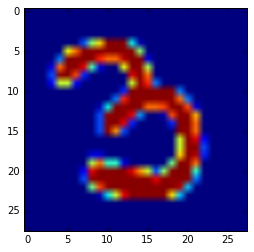

Predicted class: 3


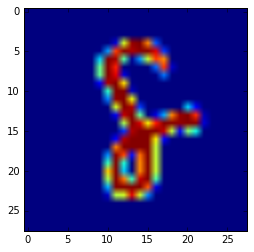

Predicted class: 8


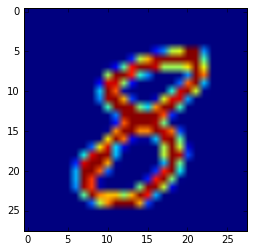

Predicted class: 8


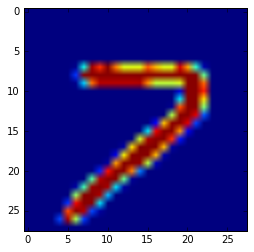

Predicted class: 7


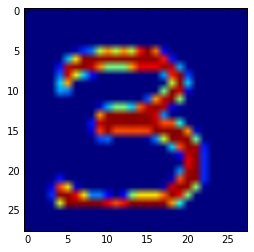

Predicted class: 3


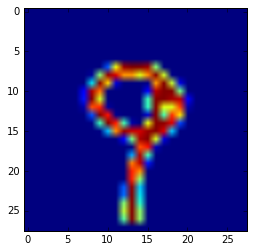

Predicted class: 9


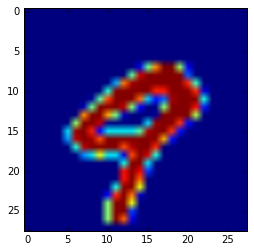

Predicted class: 9


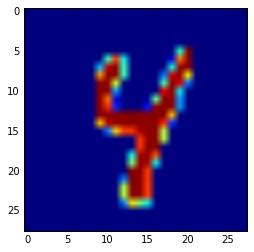

Predicted class: 9


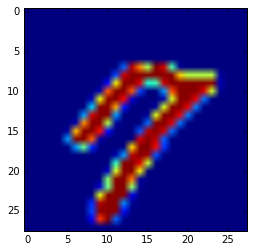

Predicted class: 9


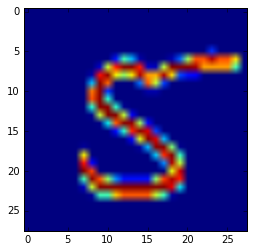

Predicted class: 5


In [9]:
Xtests = np.zeros((10, Xtest.shape[1]))
for idx, i in enumerate(np.random.randint(0, Xtest.shape[0], 10)):
    Xtests[idx, :] = Xtest[i]

Y_ = model.predict(Xtests)
y_ = np_utils.categorical_probas_to_classes(Y_)
print(y_)

for i in range(10):
    img = Xtests[i].reshape((28, 28))
    plt.imshow(img)
    plt.show()
    print("Predicted class: %d" % (y_[i]))